# Découverte de PVDAQ - Farm Solar Array - 2024

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# On a récupéré le dataset PVDAQ pour le système Farm Solar Array pour l'année 2024
# https://openei.org/wiki/PVDAQ/Sites/Farm_Solar_Array

df_elec1 = pd.read_csv("pvdaq_data_2024/2107_electrical_data_2024.csv", parse_dates=['measured_on'])
df_env1  = pd.read_csv("pvdaq_data_2024/2107_environment_data_2024.csv", parse_dates=['measured_on'])
df_irr1  = pd.read_csv("pvdaq_data_2024/2107_irradiance_data_2024.csv", parse_dates=['measured_on'])
df_meter1 = pd.read_csv("pvdaq_data_2024/2107_meter_15m_data_2024.csv", parse_dates=['measured_on'])

df_elec2 = pd.read_csv("pvdaq_data_2017_a_2023/2107_electrical_data_v1.csv", parse_dates=['measured_on'])
df_env2  = pd.read_csv("pvdaq_data_2017_a_2023/2107_environment_data.csv", parse_dates=['measured_on'])
df_irr2  = pd.read_csv("pvdaq_data_2017_a_2023/2107_irradiance_data.csv", parse_dates=['measured_on'])
df_meter2 = pd.read_csv("pvdaq_data_2017_a_2023/2107_meter_15m_data.csv", parse_dates=['measured_on'])

# Concaténation
df_elec = pd.concat([df_elec2, df_elec1], ignore_index=True)
df_env = pd.concat([df_env2, df_env1], ignore_index=True)
df_irr = pd.concat([df_irr2, df_irr1], ignore_index=True)
df_meter = pd.concat([df_meter2, df_meter1], ignore_index=True)

In [3]:
df_elec.head()

,measured_on,inv_01_dc_current_inv_149579,inv_01_dc_voltage_inv_149580,inv_01_ac_current_inv_149581,inv_01_ac_voltage_inv_149582,inv_01_ac_power_inv_149583,inv_02_dc_current_inv_149584,inv_02_dc_voltage_inv_149585,inv_02_ac_current_inv_149586,inv_02_ac_voltage_inv_149587,...,inv_23_dc_voltage_inv_149690,inv_23_ac_current_inv_149691,inv_23_ac_voltage_inv_149692,inv_23_ac_power_inv_149693,inv_24_dc_current_inv_149694,inv_24_dc_voltage_inv_149695,inv_24_ac_current_inv_149696,inv_24_ac_voltage_inv_149697,inv_24_ac_power_inv_149698,inv_05_dc_voltage_inv_149600
0,2017-11-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2017-11-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2017-11-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2017-11-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2017-11-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
df_env.head()

,measured_on,ambient_temperature_o_149575,wind_speed_o_149576,wind_direction_o_149577
0,2017-12-01 00:00:00,38.8,1.2,156.0
1,2017-12-01 00:15:00,38.8,1.2,156.0
2,2017-12-01 00:30:00,38.8,1.2,156.0
3,2017-12-01 00:45:00,38.8,1.2,156.0
4,2017-12-01 01:00:00,37.0,2.6,247.0


In [5]:
df_irr.head()

,measured_on,poa_irradiance_o_149574
0,2017-11-01 07:10:00,0.0
1,2017-11-01 07:15:00,0.0
2,2017-11-01 07:20:00,0.0
3,2017-11-01 07:25:00,0.0
4,2017-11-01 09:00:00,267.5


In [6]:
df_meter.head()

,measured_on,meter_revenue_grade_ac_output_meter_149578
0,2017-01-01 00:15:00,0.0
1,2017-01-01 00:30:00,0.0
2,2017-01-01 00:45:00,0.0
3,2017-01-01 01:00:00,0.0
4,2017-01-01 01:15:00,0.0


#### Nettoyage des identifiants des capteurs à la fin des noms des colonnes pour plus de clarté.

In [7]:
def clean_column_name(col):
    # supprime _inv_XXXXX ou _o_XXXXX
    return re.sub(r"_(inv|o|meter)_[0-9]+$", "", col)

df_elec.columns = [clean_column_name(c) for c in df_elec.columns]
df_env.columns = [clean_column_name(c) for c in df_env.columns]
df_irr.columns = [clean_column_name(c) for c in df_irr.columns]
df_meter.columns = [clean_column_name(c) for c in df_meter.columns]

print(df_elec.columns)
print(df_env.columns)
print(df_irr.columns)
print(df_meter.columns)


Index(['measured_on', 'inv_01_dc_current', 'inv_01_dc_voltage',
       'inv_01_ac_current', 'inv_01_ac_voltage', 'inv_01_ac_power',
       'inv_02_dc_current', 'inv_02_dc_voltage', 'inv_02_ac_current',
       'inv_02_ac_voltage',
       ...
       'inv_23_dc_voltage', 'inv_23_ac_current', 'inv_23_ac_voltage',
       'inv_23_ac_power', 'inv_24_dc_current', 'inv_24_dc_voltage',
       'inv_24_ac_current', 'inv_24_ac_voltage', 'inv_24_ac_power',
       'inv_05_dc_voltage'],
      dtype='object', length=121)
Index(['measured_on', 'ambient_temperature', 'wind_speed', 'wind_direction'], dtype='object')
Index(['measured_on', 'poa_irradiance'], dtype='object')
Index(['measured_on', 'meter_revenue_grade_ac_output'], dtype='object')


#### On merge les 4 dataset ensemble

On convertit les colonnes "measured_on" en datetime ce qui permet un merge exact et on garde seulement les timestamps communs à tous les datasets.

In [8]:
for df in [df_elec, df_env, df_irr, df_meter]:
    df['measured_on'] = pd.to_datetime(df['measured_on'])

In [9]:
merged = df_elec.merge(df_env, on='measured_on', how='inner') \
            .merge(df_irr, on='measured_on', how='inner') \
            .merge(df_meter, on='measured_on', how='inner')

## **Exploration du dataset mergé**

In [10]:
merged.head()

,measured_on,inv_01_dc_current,inv_01_dc_voltage,inv_01_ac_current,inv_01_ac_voltage,inv_01_ac_power,inv_02_dc_current,inv_02_dc_voltage,inv_02_ac_current,inv_02_ac_voltage,...,inv_24_dc_voltage,inv_24_ac_current,inv_24_ac_voltage,inv_24_ac_power,inv_05_dc_voltage,ambient_temperature,wind_speed,wind_direction,poa_irradiance,meter_revenue_grade_ac_output
0,2017-12-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,38.8,1.2,156.0,0.0,0.0
1,2017-12-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,37.0,2.6,247.0,0.0,0.0
2,2017-12-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,37.0,2.6,247.0,0.0,0.0
3,2017-12-01 01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,37.0,2.6,247.0,0.0,0.0
4,2017-12-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,37.5,1.9,265.0,0.0,0.0


In [11]:
print(merged.dtypes)

measured_on                      datetime64[ns]
inv_01_dc_current                       float64
inv_01_dc_voltage                       float64
inv_01_ac_current                       float64
inv_01_ac_voltage                       float64
                                      ...      
ambient_temperature                     float64
wind_speed                              float64
wind_direction                          float64
poa_irradiance                          float64
meter_revenue_grade_ac_output           float64
Length: 126, dtype: object


In [12]:
print(merged.shape)

(199711, 126)


In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199711 entries, 0 to 199710
Columns: 126 entries, measured_on to meter_revenue_grade_ac_output
dtypes: datetime64[ns](1), float64(125)
memory usage: 192.0 MB


In [14]:
merged.describe()

,measured_on,inv_01_dc_current,inv_01_dc_voltage,inv_01_ac_current,inv_01_ac_voltage,inv_01_ac_power,inv_02_dc_current,inv_02_dc_voltage,inv_02_ac_current,inv_02_ac_voltage,...,inv_24_dc_voltage,inv_24_ac_current,inv_24_ac_voltage,inv_24_ac_power,inv_05_dc_voltage,ambient_temperature,wind_speed,wind_direction,poa_irradiance,meter_revenue_grade_ac_output
count,199711,199711.000000,199711.000000,199711.000000,199711.00000,199711.000000,199711.000000,199711.000000,199711.000000,199711.000000,...,199711.000000,199711.000000,199711.000000,199711.000000,24391.000000,199580.000000,199695.000000,199703.000000,199711.000000,199711.000000
mean,2021-04-02 17:11:27.283624448,11.746963,374.509008,8.844126,160.33289,7.545081,11.040920,371.208704,8.339900,159.173965,...,381.964213,8.650573,163.534551,7.395053,421.243825,63.591876,5.701643,182.215397,268.612198,180.572732
min,2017-12-01 00:15:00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,23.400000,1.000000,0.000000,0.000000,0.000000
25%,2019-07-04 16:52:30,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,51.500000,2.900000,120.000000,0.000000,0.000000
50%,2021-02-28 10:45:00,1.200000,612.634000,1.339000,279.06700,0.315000,0.447000,598.655000,1.059000,279.632000,...,608.976000,1.420000,279.779000,0.110000,614.169000,62.300000,4.400000,153.000000,38.200000,17.280000
75%,2022-12-15 14:37:30,22.907500,682.601500,17.754000,287.11600,15.188000,20.892000,681.457000,16.327000,287.848000,...,687.603000,17.098000,286.894000,14.718500,672.739500,75.100000,7.300000,262.000000,546.600000,381.440000
max,2024-11-01 23:15:00,52.160000,909.840000,36.338000,310.67700,30.085000,54.844000,1750.755000,35.907000,310.436000,...,912.795000,35.848000,310.605000,30.089000,851.387000,115.600000,30.900000,360.000000,1400.000000,1783.680000
std,NaN,16.123177,334.581506,11.883779,142.14886,10.400228,15.801546,334.134676,11.564696,142.679477,...,335.311388,11.798319,141.548783,10.384771,314.551821,15.687559,4.013714,98.294213,348.407287,234.373358


Valeurs manquantes

In [15]:
missing = merged.isna().sum()
missing = missing[missing > 0]

# Ajouter le pourcentage par rapport au dataset total
total_rows = len(merged)
missing_pct = (missing / total_rows) * 100

missing_report = pd.DataFrame({
    'nombre_manquants': missing,
    'pourcentage': missing_pct,
    'pourcentage_arrondi': missing_pct.round(2)
})

print("=== VALEURS MANQUANTES ===\n")
print(missing_report)
print(f"\nTotal de lignes: {total_rows}")


=== VALEURS MANQUANTES ===

                     nombre_manquants  pourcentage  pourcentage_arrondi
inv_05_dc_voltage              175320    87.786852                87.79
ambient_temperature               131     0.065595                 0.07
wind_speed                         16     0.008012                 0.01
wind_direction                      8     0.004006                 0.00

Total de lignes: 199711


In [16]:
# inv_05_dc_voltage a plus de 87% de valeurs manquantes donc on ne va pas essayer de la traiter, on va la drop
# directement pour ne pas qu'elle impacte les totaux plus tard
# MAIS ON NOTE QUAND MEME QUE CE CAPTEUR DEVAIT ETRE DEFAILLANT POUR AVOIR AUSSI PEU DE VALEURS

In [17]:
# Supprimer les colonnes avec trop de valeurs manquantes (>50%)
threshold = 0.50
cols_to_drop = []

for col in merged.columns:
    missing_pct = (merged[col].isna().sum() / len(merged))
    if missing_pct > threshold:
        cols_to_drop.append(col)

if cols_to_drop:
    print(f"SUPPRESSION DES COLONNES AVEC >50% DE DONNÉES MANQUANTES:\n")
    for col in cols_to_drop:
        pct = (merged[col].isna().sum() / len(merged)) * 100
        print(f"  - {col}: {pct:.1f}% → DROPÉE")
    
    merged = merged.drop(columns=cols_to_drop)
    print(f"\n✓ {len(cols_to_drop)} colonne(s) supprimée(s)")
    print(f"  Shape avant: {len(merged.columns) + len(cols_to_drop)} colonnes")
    print(f"  Shape après: {len(merged.columns)} colonnes")
else:
    print("✓ Aucune colonne à supprimer")
# Sauvegarder le nombre de valeurs manquantes avant imputation
missing_before = merged.isna().sum()


SUPPRESSION DES COLONNES AVEC >50% DE DONNÉES MANQUANTES:

  - inv_05_dc_voltage: 87.8% → DROPÉE

✓ 1 colonne(s) supprimée(s)
  Shape avant: 126 colonnes
  Shape après: 125 colonnes


In [18]:
# on va aussi drop inv_05_dc_current pour ne pas créer de problèmes plus tard
merged = merged.drop("inv_05_dc_current", axis=1) 

In [19]:
from sklearn.impute import KNNImputer
# Utiliser KNNImputer avec 5 voisins pour l'imputation des séries temporelles
# Les données sont ordonnées temporellement, donc les voisins proches dans le temps auront des valeurs similaires
knn_imputer = KNNImputer(n_neighbors=5, weights='distance')

# Appliquer l'imputation sur toutes les colonnes numériques
numeric_cols = merged.select_dtypes(include=[np.number]).columns
merged[numeric_cols] = knn_imputer.fit_transform(merged[numeric_cols])

# Vérifier les résultats après imputation
missing_after = merged.isna().sum()
missing_after = missing_after[missing_after > 0]

print("\n=== IMPUTATION KNEIGHBORS ===\n")
print(f"Méthode: KNNImputer avec k=5 voisins")
print(f"Principe: Utilise les 5 observations temporellement proches pour remplir les valeurs manquantes")
print(f"\nValeurs manquantes AVANT imputation: {missing_before.sum()}")
print(f"Valeurs manquantes APRÈS imputation: {missing_after.sum() if len(missing_after) > 0 else 0}")
print(f"\nStatut: Imputation {'RÉUSSIE ✓' if len(missing_after) == 0 else 'PARTIELLE'}")


=== IMPUTATION KNEIGHBORS ===

Méthode: KNNImputer avec k=5 voisins
Principe: Utilise les 5 observations temporellement proches pour remplir les valeurs manquantes

Valeurs manquantes AVANT imputation: 155
Valeurs manquantes APRÈS imputation: 0

Statut: Imputation RÉUSSIE ✓


In [20]:
print("Plage des dates où les mesures ont été réalisées")
print(merged['measured_on'].min())
print(merged['measured_on'].max())


print("\nNombre de points par jours en moyenne")
daily_counts = merged['measured_on'].dt.date.value_counts().sort_index()
print(np.average(daily_counts))

Plage des dates où les mesures ont été réalisées
2017-12-01 00:15:00
2024-11-01 23:15:00

Nombre de points par jours en moyenne
83.4563309653155


Total DC I, V and power

In [21]:
merged["I_dc_total"] = merged.filter(like="_dc_current").sum(axis=1)
merged["V_dc_avg"]   = merged.filter(like="_dc_voltage").mean(axis=1)


V = merged.filter(like="_dc_voltage")
I = merged.filter(like="_dc_current")

merged["P_dc_total"] = (V.values * I.values).sum(axis=1)


C:\Users\DELL\AppData\Local\Temp\ipykernel_14888\209160698.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged["I_dc_total"] = merged.filter(like="_dc_current").sum(axis=1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14888\209160698.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged["V_dc_avg"]   = merged.filter(like="_dc_voltage").mean(axis=1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14888\209160698.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

Total AC I, V and power

In [22]:
merged["I_ac_total"] = merged.filter(like="_ac_current").sum(axis=1)
merged["V_ac_avg"]   = merged.filter(like="_ac_voltage").mean(axis=1)

V_ac = merged.filter(like="_ac_voltage")
I_ac = merged.filter(like="_ac_current")

merged['P_ac_total'] = (V_ac.values * I_ac.values).sum(axis=1)
merged.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14888\1688563003.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged["I_ac_total"] = merged.filter(like="_ac_current").sum(axis=1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14888\1688563003.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged["V_ac_avg"]   = merged.filter(like="_ac_voltage").mean(axis=1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14888\1688563003.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

,measured_on,inv_01_dc_current,inv_01_dc_voltage,inv_01_ac_current,inv_01_ac_voltage,inv_01_ac_power,inv_02_dc_current,inv_02_dc_voltage,inv_02_ac_current,inv_02_ac_voltage,...,wind_speed,wind_direction,poa_irradiance,meter_revenue_grade_ac_output,I_dc_total,V_dc_avg,P_dc_total,I_ac_total,V_ac_avg,P_ac_total
0,2017-12-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.2,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-12-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.6,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-12-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.6,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-12-01 01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.6,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-12-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.9,265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
cols_of_interest = [
    "measured_on",
    "poa_irradiance",
    "wind_speed",
    "wind_direction",
    "ambient_temperature",
    "meter_revenue_grade_ac_output",
    "P_dc_total",
    "I_dc_total",
    "V_dc_avg",
    "P_ac_total",
    "I_ac_total",
    "V_ac_avg",
]

df = merged[cols_of_interest].copy()

## Export du dataset fusionné

In [24]:
import os

# Create the output directory if it doesn't exist
output_dir = "processed_pvdaq_data_2017_2024"
os.makedirs(output_dir, exist_ok=True)

# Export the merged dataset
output_file = os.path.join(output_dir, "processed_pvdaq_data_2017_2024.csv")
merged.to_csv(output_file, index=False)

print(f"Dataset exported successfully to: {output_file}")
print(f"Dataset shape: {merged.shape}")
print(f"File size: {os.path.getsize(output_file) / (1024**2):.2f} MB")

Dataset exported successfully to: processed_pvdaq_data_2017_2024\processed_pvdaq_data_2017_2024.csv
Dataset shape: (199711, 130)
File size: 155.41 MB


## Visualisations et Insights des données

#### What are we looking for in these visualizations?

We want to understand how well our solar panels are working and find any problems that might be reducing their performance.


C:\Users\DELL\AppData\Local\Temp\ipykernel_14888\1129129963.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_power = df.groupby(pd.cut(df["ambient_temperature"], bins=10))["P_ac_total"].mean()


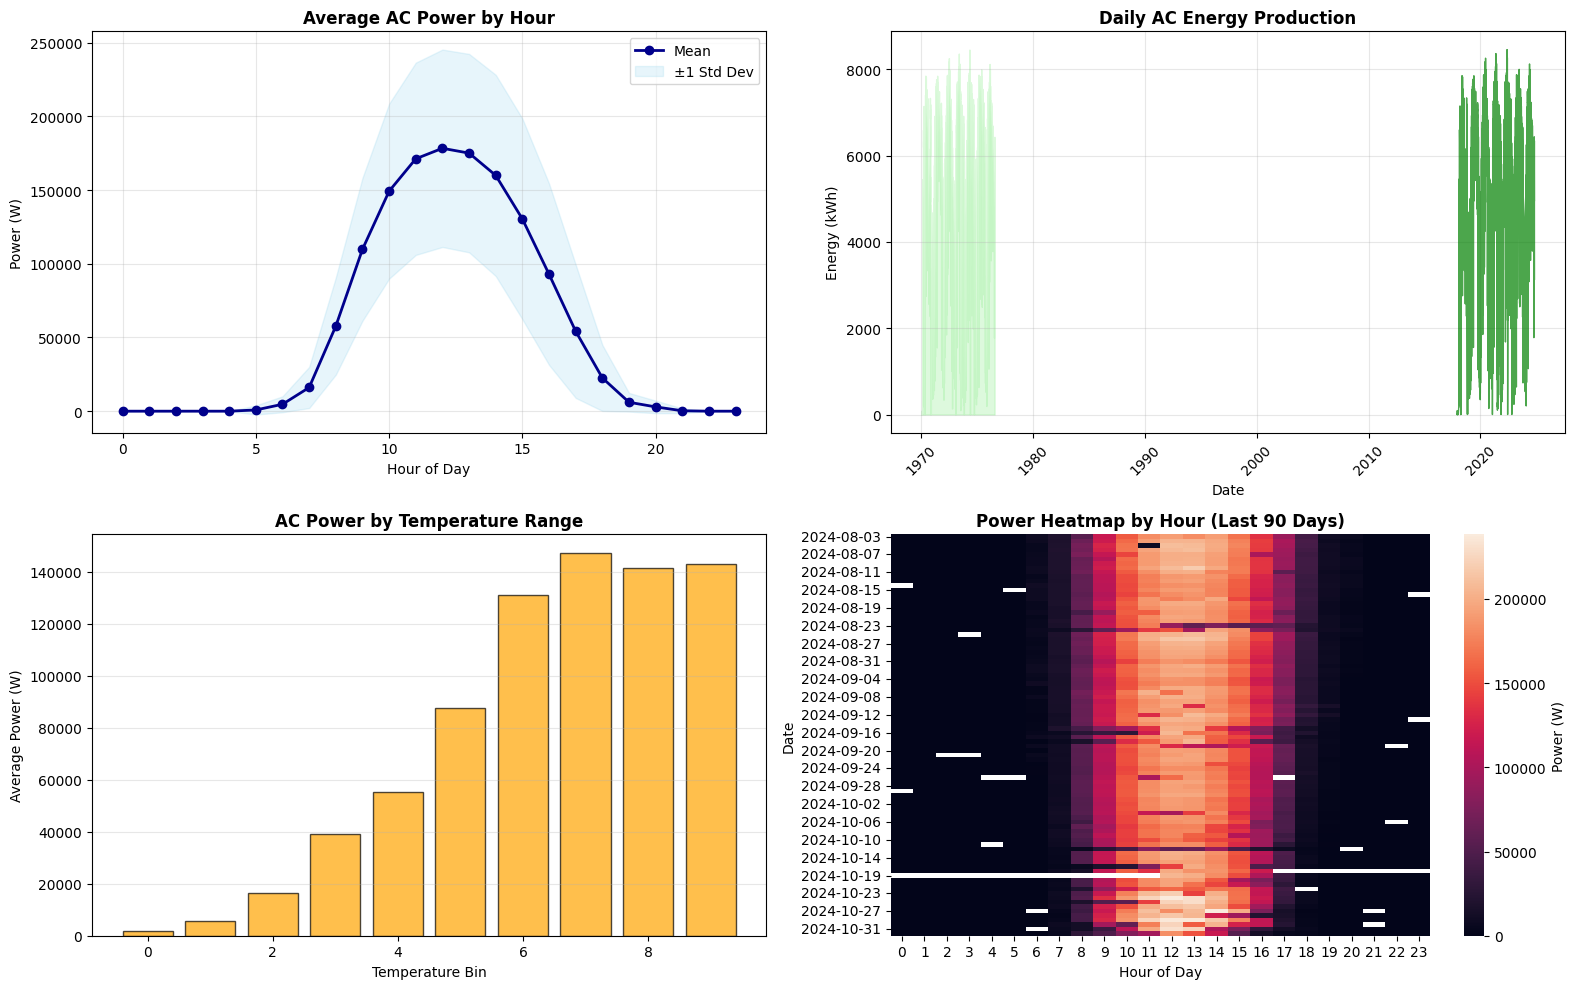


Daily Production Statistics:
  Mean Daily Energy: 5215.67 kWh
  Max Daily Energy: 8460.78 kWh
  Min Daily Energy: 0.00 kWh
  Total Period Energy: 12481098.17 kWh


In [25]:
### 2. Diurnal Pattern Analysis - Hourly and Daily Production
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Prepare time components
df["date"] = df["measured_on"].dt.date
df["hour"] = df["measured_on"].dt.hour

# Panel 1: Average AC power by hour
hourly_power = df.groupby("hour")["P_ac_total"].agg(['mean', 'std'])
axes[0, 0].plot(hourly_power.index, hourly_power['mean'], marker='o', linewidth=2, color='darkblue', label='Mean')
axes[0, 0].fill_between(hourly_power.index, 
                        hourly_power['mean'] - hourly_power['std'],
                        hourly_power['mean'] + hourly_power['std'],
                        alpha=0.2, color='skyblue', label='±1 Std Dev')
axes[0, 0].set_title("Average AC Power by Hour", fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel("Hour of Day")
axes[0, 0].set_ylabel("Power (W)")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Panel 2: Daily energy production over time
daily_energy = df.groupby("date")["P_ac_total"].sum() / 1000  # Convert to kWh
axes[0, 1].plot(daily_energy.index, daily_energy.values, marker='', linewidth=1, color='green', alpha=0.7)
axes[0, 1].fill_between(range(len(daily_energy)), daily_energy.values, alpha=0.3, color='lightgreen')
axes[0, 1].set_title("Daily AC Energy Production", fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Energy (kWh)")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Panel 3: Average power by temperature
temp_power = df.groupby(pd.cut(df["ambient_temperature"], bins=10))["P_ac_total"].mean()
axes[1, 0].bar(range(len(temp_power)), temp_power.values, color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_title("AC Power by Temperature Range", fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel("Temperature Bin")
axes[1, 0].set_ylabel("Average Power (W)")
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Panel 4: Heatmap of power by hour and date (sample of data to avoid too large plot)
df_sample = df[df['date'] >= df['date'].max() - pd.Timedelta(days=90)]  # Last 90 days
pivot_power = df_sample.pivot_table(values='P_ac_total', index='date', columns='hour', aggfunc='mean')
sns.heatmap(pivot_power, ax=axes[1, 1], cbar_kws={'label': 'Power (W)'})
axes[1, 1].set_title("Power Heatmap by Hour (Last 90 Days)", fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel("Date")
axes[1, 1].set_xlabel("Hour of Day")

plt.tight_layout()
plt.show()

print(f"\nDaily Production Statistics:")
print(f"  Mean Daily Energy: {daily_energy.mean():.2f} kWh")
print(f"  Max Daily Energy: {daily_energy.max():.2f} kWh")
print(f"  Min Daily Energy: {daily_energy.min():.2f} kWh")
print(f"  Total Period Energy: {daily_energy.sum():.2f} kWh")

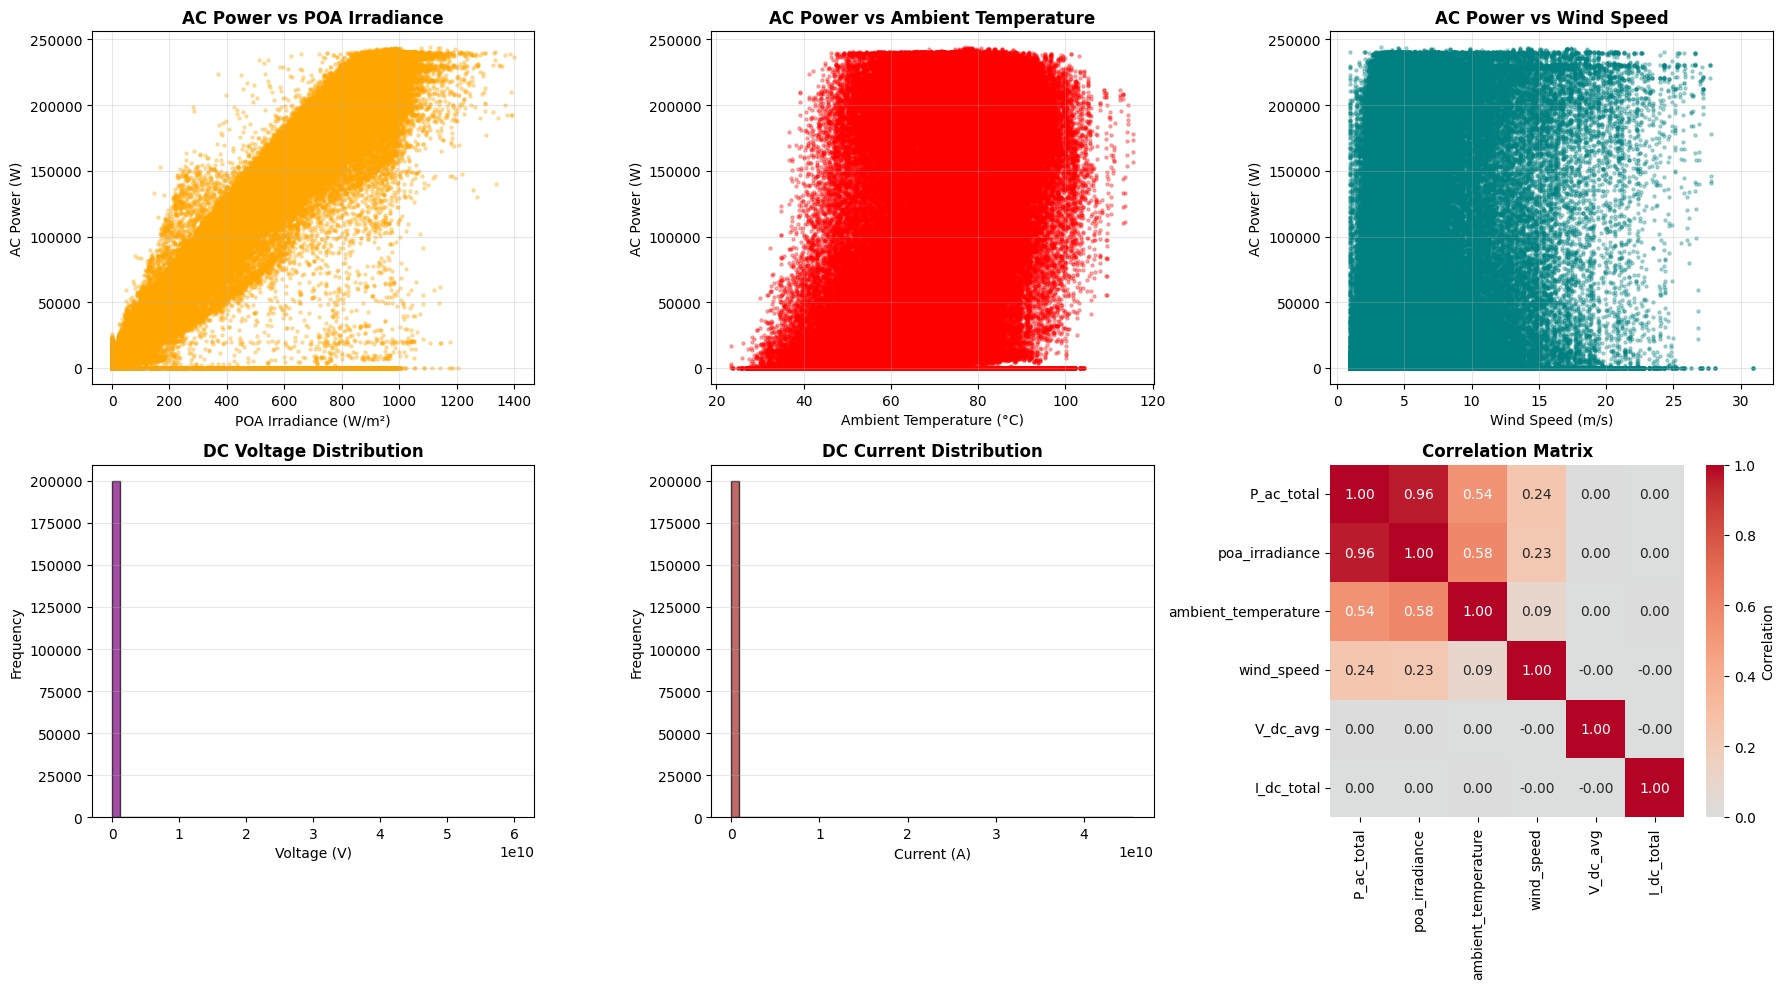


Environmental Impact Statistics:
  Correlation (Irradiance - Power): 0.959
  Correlation (Temperature - Power): 0.537
  Correlation (Wind Speed - Power): 0.239


In [26]:
### 3. Environmental Factors Impact Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Panel 1: Irradiance vs Power
axes[0, 0].scatter(df["poa_irradiance"], df["P_ac_total"], alpha=0.3, s=5, color='orange')
axes[0, 0].set_title("AC Power vs POA Irradiance", fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel("POA Irradiance (W/m²)")
axes[0, 0].set_ylabel("AC Power (W)")
axes[0, 0].grid(True, alpha=0.3)

# Panel 2: Temperature vs Power
axes[0, 1].scatter(df["ambient_temperature"], df["P_ac_total"], alpha=0.3, s=5, color='red')
axes[0, 1].set_title("AC Power vs Ambient Temperature", fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel("Ambient Temperature (°C)")
axes[0, 1].set_ylabel("AC Power (W)")
axes[0, 1].grid(True, alpha=0.3)

# Panel 3: Wind Speed vs Power
axes[0, 2].scatter(df["wind_speed"], df["P_ac_total"], alpha=0.3, s=5, color='teal')
axes[0, 2].set_title("AC Power vs Wind Speed", fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel("Wind Speed (m/s)")
axes[0, 2].set_ylabel("AC Power (W)")
axes[0, 2].grid(True, alpha=0.3)

# Panel 4: DC Voltage distribution
axes[1, 0].hist(df["V_dc_avg"], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 0].set_title("DC Voltage Distribution", fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel("Voltage (V)")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Panel 5: DC Current distribution
axes[1, 1].hist(df["I_dc_total"], bins=50, edgecolor='black', alpha=0.7, color='brown')
axes[1, 1].set_title("DC Current Distribution", fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel("Current (A)")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Panel 6: Correlation heatmap
corr_cols = ["P_ac_total", "poa_irradiance", "ambient_temperature", "wind_speed", "V_dc_avg", "I_dc_total"]
corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1, 2], 
            cbar_kws={'label': 'Correlation'})
axes[1, 2].set_title("Correlation Matrix", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nEnvironmental Impact Statistics:")
print(f"  Correlation (Irradiance - Power): {df['poa_irradiance'].corr(df['P_ac_total']):.3f}")
print(f"  Correlation (Temperature - Power): {df['ambient_temperature'].corr(df['P_ac_total']):.3f}")
print(f"  Correlation (Wind Speed - Power): {df['wind_speed'].corr(df['P_ac_total']):.3f}")

C:\Users\DELL\AppData\Local\Temp\ipykernel_14888\894851288.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_group_stats = df.groupby(bins).agg({


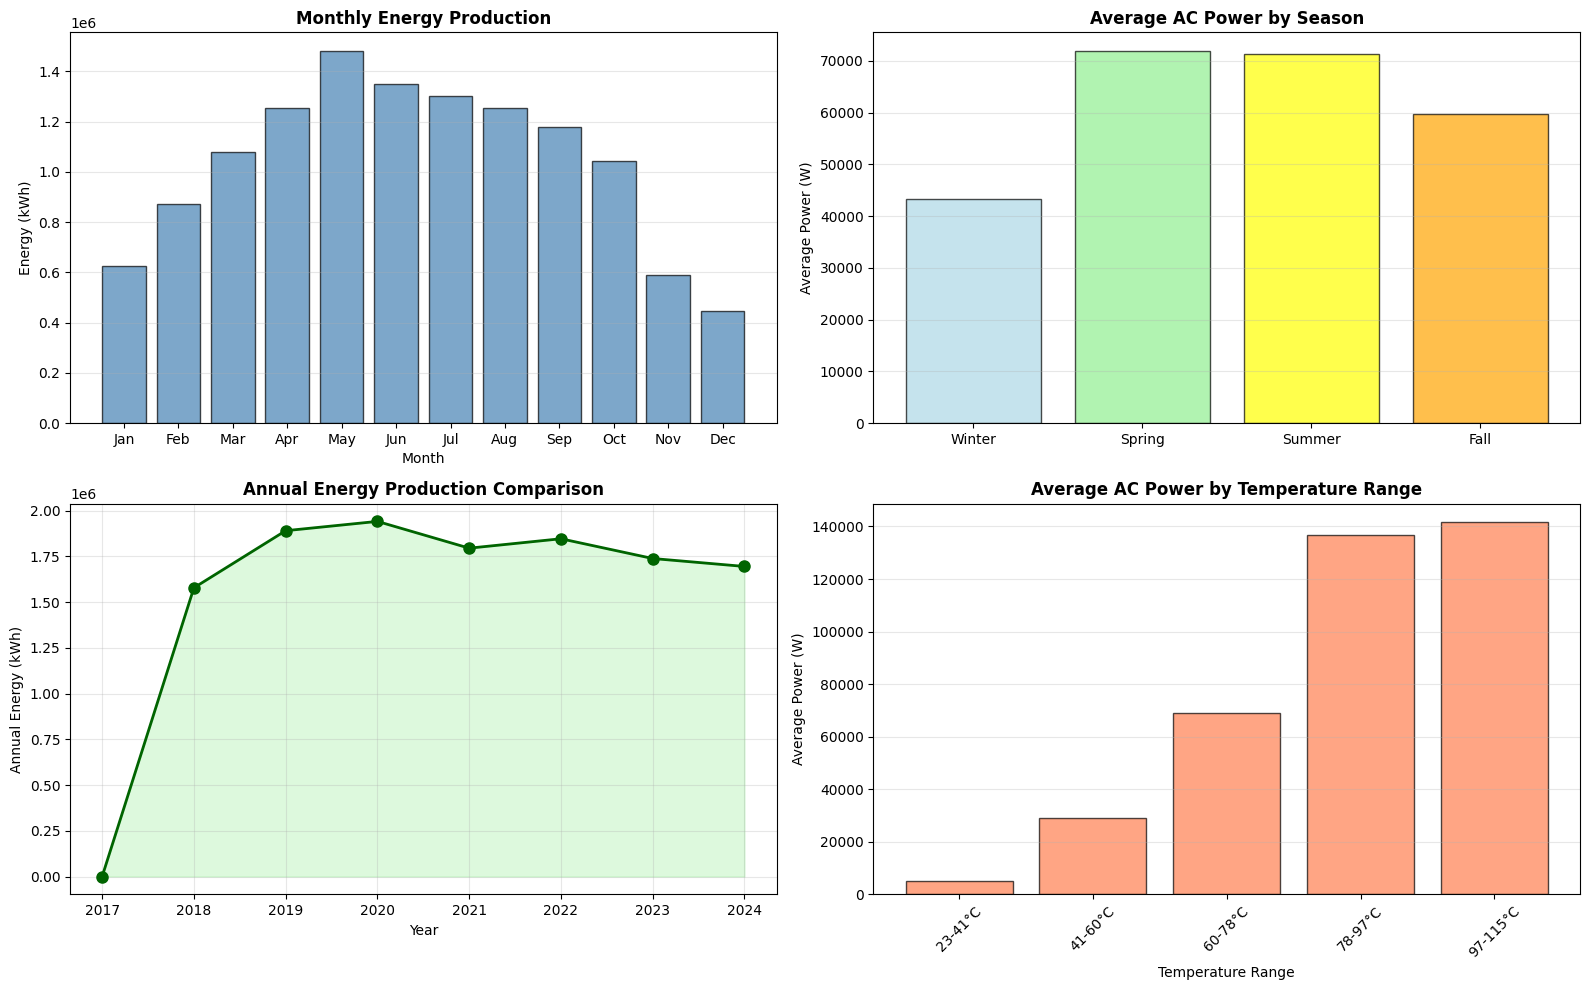


Seasonal and Temporal Analysis:
  Winter: 1944914 kWh, Avg Temp: 49.1°C
  Spring: 3816474 kWh, Avg Temp: 61.8°C
  Summer: 3906146 kWh, Avg Temp: 76.9°C
  Fall: 2813564 kWh, Avg Temp: 64.0°C


In [27]:
### 5. Seasonal and Temporal Trends Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Add month and season information
df["month"] = df["measured_on"].dt.month
df["year"] = df["measured_on"].dt.year
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"
df["season"] = df["month"].apply(get_season)

# Panel 1: Monthly energy production
monthly_energy = df.groupby("month")["P_ac_total"].sum() / 1000  # Convert to kWh
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0, 0].bar(range(1, 13), [monthly_energy.get(m, 0) for m in range(1, 13)], 
              edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title("Monthly Energy Production", fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Energy (kWh)")
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].set_xticklabels(month_names)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Panel 2: Seasonal comparison
seasonal_stats = df.groupby("season").agg({
    "P_ac_total": ["mean", "sum"],
    "poa_irradiance": "mean",
    "ambient_temperature": "mean"
})
seasons_order = ["Winter", "Spring", "Summer", "Fall"]
seasonal_power = [seasonal_stats.loc[s, ("P_ac_total", "mean")] if s in seasonal_stats.index else 0 for s in seasons_order]
axes[0, 1].bar(seasons_order, seasonal_power, edgecolor='black', alpha=0.7, color=['lightblue', 'lightgreen', 'yellow', 'orange'])
axes[0, 1].set_title("Average AC Power by Season", fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel("Average Power (W)")
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Panel 3: Year-over-year comparison (if data spans multiple years)
yearly_energy = df.groupby("year")["P_ac_total"].sum() / 1000  # Convert to kWh
axes[1, 0].plot(yearly_energy.index, yearly_energy.values, marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1, 0].fill_between(yearly_energy.index, yearly_energy.values, alpha=0.3, color='lightgreen')
axes[1, 0].set_title("Annual Energy Production Comparison", fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Annual Energy (kWh)")
axes[1, 0].grid(True, alpha=0.3)

# Panel 4: Temperature-adjusted performance
bins = pd.cut(df["ambient_temperature"], bins=5)
temp_group_stats = df.groupby(bins).agg({
    "P_ac_total": "mean",
    "poa_irradiance": "mean"
})
temp_ranges = [f"{int(interval.left)}-{int(interval.right)}°C" for interval in temp_group_stats.index]
axes[1, 1].bar(range(len(temp_group_stats)), temp_group_stats["P_ac_total"].values, 
              edgecolor='black', alpha=0.7, color='coral')
axes[1, 1].set_title("Average AC Power by Temperature Range", fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel("Temperature Range")
axes[1, 1].set_ylabel("Average Power (W)")
axes[1, 1].set_xticks(range(len(temp_ranges)))
axes[1, 1].set_xticklabels(temp_ranges, rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nSeasonal and Temporal Analysis:")
for season in seasons_order:
    if season in seasonal_stats.index:
        energy = seasonal_stats.loc[season, ("P_ac_total", "sum")] / 1000
        avg_temp = seasonal_stats.loc[season, ("ambient_temperature", "mean")]
        print(f"  {season}: {energy:.0f} kWh, Avg Temp: {avg_temp:.1f}°C")

<Axes: >

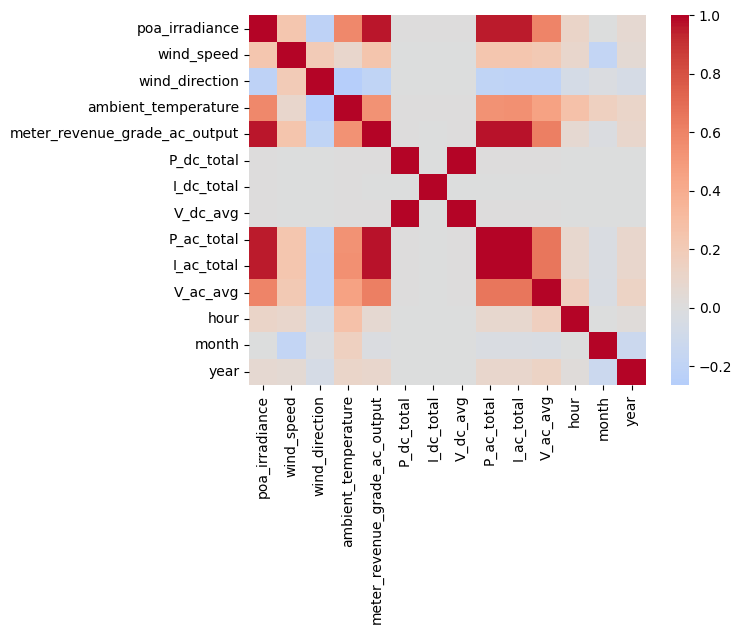

In [28]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)

<Axes: xlabel='poa_irradiance', ylabel='P_ac_total'>

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


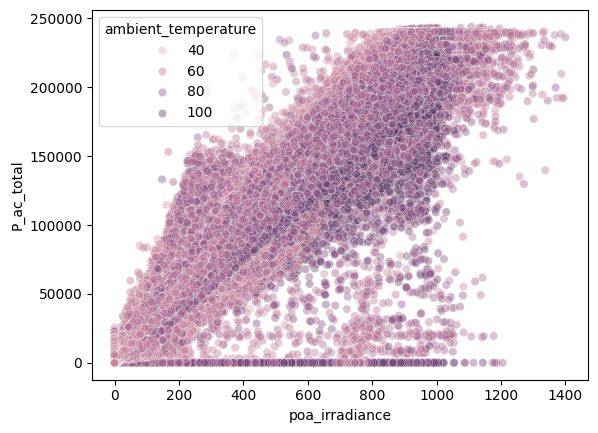

In [29]:
sns.scatterplot(
    data=df,
    x="poa_irradiance",
    y="P_ac_total",
    hue="ambient_temperature",
    alpha=0.4
)


<Axes: xlabel='hour', ylabel='date'>

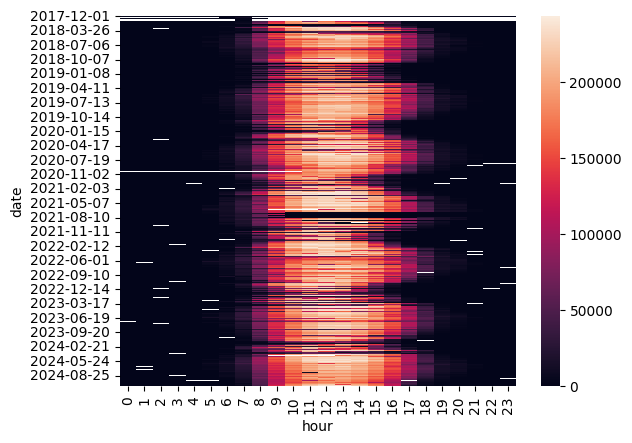

In [30]:
df["date"] = df["measured_on"].dt.date
df["hour"] = df["measured_on"].dt.hour
pivot = df.pivot_table(values="P_ac_total", index="date", columns="hour")
sns.heatmap(pivot)

## Test de Solar Data Tools sur le dataset

In [31]:
# %pip install solar-data-tools

In [32]:
df.dtypes

measured_on                      datetime64[ns]
poa_irradiance                          float64
wind_speed                              float64
wind_direction                          float64
ambient_temperature                     float64
meter_revenue_grade_ac_output           float64
P_dc_total                              float64
I_dc_total                              float64
V_dc_avg                                float64
P_ac_total                              float64
I_ac_total                              float64
V_ac_avg                                float64
date                                     object
hour                                      int32
month                                     int32
year                                      int32
season                                   object
dtype: object

- P_dc_total : puissance totale côté DC (somme des strings en entrée onduleurs). Baisse anormale à irradiance donnée = signe direct d’ombrage ou défaut PV.
- I_dc_total : courant total côté DC. L’ombre fait chuter le courant (moins de photons) plus vite que la tension, donc sensible aux masquages partiels.
- V_dc_avg : tension moyenne côté DC. L’ombre influe moins la tension que le courant, mais une baisse de tension peut signaler bypass activés ou mismatch fort.


- P_ac_total : puissance totale injectée côté AC. Sert à vérifier si la perte DC se répercute et à distinguer pertes internes onduleur vs ombrage.
- I_ac_total : courant total côté AC. Doit suivre la tendance de P_ac_total; une chute AC sans chute DC peut indiquer limitation/cutdown onduleur ou réseau plutôt qu’ombre.
- V_ac_total : tension totale côté AC. Souvent stable; variations ou chutes AC peuvent indiquer problèmes réseau/onduler plutôt que l’ombre.

In [33]:
from solardatatools import DataHandler

df = df.set_index('measured_on')

dh=DataHandler(df)

dh.run_pipeline(power_col='P_ac_total')


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list:   0%|                                          | 0/7 [00:00<?, ?it/s]

CAUTION: Multiple scan rates detected!
Scan rates (in seconds): [900, 1800]
0 transitions detected.
Suggest splitting data set between:




task list: 100%|██████████████████████████████████| 7/7 [02:32<00:00, 21.77s/it]



total time: 152.42 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              39.52s
Cleaning                   1.42s
Filtering/Summarizing      111.47s
    Data quality           1.09s
    Clear day detect       1.92s
    Clipping detect        70.21s
    Capacity change detect 38.25s



In [34]:
print(dh.report())


-----------------
DATA SET REPORT
-----------------
length               6.93 years
capacity estimate    217.95 kW
data sampling        15 minutes
quality score        0.89
clearness score      0.37
inverter clipping    True
clipped fraction     0.08
capacity changes     False
data quality warning False
time shift errors    False
time zone errors     False
            
None


In [35]:
#dh.plot_daily_energy
#dh.plot_heatmap

In [36]:
#dh.run_loss_factor_analysis()

In [37]:
#dh.loss_analysis.plot_pie

In [38]:
#dh.loss_analysis.plot_decomposition

In [39]:
# samples_per_day = 96  # 15-min intervals

# # Group by day
# daily_groups = df['total_ac_power'].resample('D')

# # Create matrix
# matrix = np.array([day.values for day in daily_groups if len(day) == samples_per_day])
# print(matrix.shape)

(CVXPY) Dec 10 11:53:51 AM: Your problem has 36378 variables, 59742 constraints, and 1536 parameters.
(CVXPY) Dec 10 11:53:51 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 10 11:53:51 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Dec 10 11:53:51 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Dec 10 11:53:51 AM: Compiling problem (target solver=CLARABEL).
(CVXPY) Dec 10 11:53:51 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> CLARABEL
(CVXPY) Dec 10 11:53:51 AM: Applying reduction Dcp2Cone
(CVXPY) Dec 10 11:53:51 AM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 10 11:53:51 AM: Applying reduction ConeMatrixStuffing


                                     CVXPY                                     
                                     v1.7.3                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------


(CVXPY) Dec 10 11:53:52 AM: Applying reduction CLARABEL
(CVXPY) Dec 10 11:53:52 AM: Finished problem compilation (took 7.171e-01 seconds).
(CVXPY) Dec 10 11:53:52 AM: (Subsequent compilations of this problem, using the same arguments, should take less time.)
(CVXPY) Dec 10 11:53:52 AM: Invoking solver CLARABEL  to obtain a solution.


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
-------------------------------------------------------------
           Clarabel.rs v0.11.1  -  Clever Acronym                

                   (c) Paul Goulart                          
                University of Oxford, 2022                   
-------------------------------------------------------------

problem:
  variables     = 95420
  constraints   = 130816
  nnz(P)        = 47010
  nnz(A)        = 451302
  cones (total) = 2
    :        Zero = 1,  numel = 71168
    : Nonnegative = 1,  numel = 59648

settings:
  linear algebra: direct / faer, precision: 64 bit (8 threads)
  max iter = 200, time limit = Inf,  max step = 0.990
  tol_feas = 1.0e-8, tol_gap_abs = 1.0e-8, tol_gap_rel = 1.0e-8,
  static reg : on, ϵ1 = 1.0e-8, ϵ2 = 4.9e-32
  d

(CVXPY) Dec 10 11:58:58 AM: Problem status: optimal
(CVXPY) Dec 10 11:58:58 AM: Optimal value: 9.307e+02
(CVXPY) Dec 10 11:58:58 AM: Compilation took 7.171e-01 seconds
(CVXPY) Dec 10 11:58:58 AM: Solver (including time spent in interface) took 3.063e+02 seconds


169  +9.3069e+02  +9.3069e+02  9.32e-09  8.61e-09  7.99e-15  8.90e-12  4.30e-12  4.34e-01  
---------------------------------------------------------------------------------------------
Terminated with status = Solved
solve time = 306.0706852s
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
True
component arg must be one of ['clear', 'shade', 'residual']


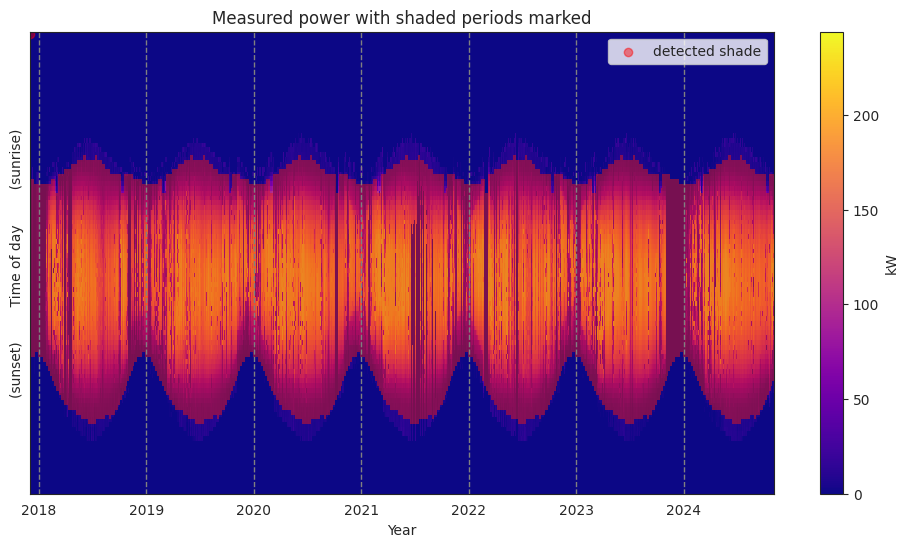

In [40]:
from solardatatools.algorithms.shade import ShadeAnalysis

shade = ShadeAnalysis(data_handler=dh, matrix=None)

# Run the shading detection
shade.run(power=8, solver='CLARABEL', verbose=True)

# Check if the analysis ran
print(shade.has_run)  # True if completed

# Plot heatmap of shading anomalies
shade.plot_annotated_heatmap(figsize=(12,6))

# component analysis
shade.plot_component('shading')

In [41]:
def inspect_df(df):
    info = pd.DataFrame({
        "dtype": df.dtypes,
        "nb_valeurs": df.count(),
        "nb_na": df.isna().sum(),
        "pct_na": df.isna().mean() * 100,
        "nb_zero": (df == 0).sum(numeric_only=False),
        "pct_zero": (df == 0).mean(numeric_only=False) * 100
    })

    def etat_col(pct):
        if pct == 100:
            return "vide"
        elif pct == 0:
            return "pleine"
        else:
            return "partielle"

    info["etat"] = info["pct_na"].apply(etat_col)

    return info

# Exemple d'utilisation
result = inspect_df(df)
print(result)

'''
nb_na → nombre de valeurs manquantes

pct_na → pourcentage de valeurs manquantes

nb_zero → nombre de valeurs égales à 0

pct_zero → pourcentage de valeurs égales à 0

etat → colonne vide / pleine / partielle
'''

                                 dtype  nb_valeurs  nb_na  pct_na  nb_zero  \
poa_irradiance                 float64      199711      0     0.0    82970   
wind_speed                     float64      199711      0     0.0        0   
wind_direction                 float64      199711      0     0.0      320   
ambient_temperature            float64      199711      0     0.0        0   
meter_revenue_grade_ac_output  float64      199711      0     0.0    89921   
P_dc_total                     float64      199711      0     0.0    79310   
I_dc_total                     float64      199711      0     0.0    79310   
V_dc_avg                       float64      199711      0     0.0    79307   
P_ac_total                     float64      199711      0     0.0    79909   
I_ac_total                     float64      199711      0     0.0    79909   
V_ac_avg                       float64      199711      0     0.0    79314   
date                            object      199711      0     0.

'\nnb_na → nombre de valeurs manquantes\n\npct_na → pourcentage de valeurs manquantes\n\nnb_zero → nombre de valeurs égales à 0\n\npct_zero → pourcentage de valeurs égales à 0\n\netat → colonne vide / pleine / partielle\n'